<a href="https://colab.research.google.com/github/ojasgulati/Aadhaar-OCR/blob/main/Aadhar_Card_Object_Detection_by_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv8 Object Detection on a Custom Dataset

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Converting to TFLite Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sat Mar 29 17:36:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install "ultralytics<=8.3.40"

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Follow the tutorial to create dataset [here](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/#preparing-a-custom-dataset-for-yolov8)

Once you have dataset ready, Create API key for your workspace use it below




In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="22CALnw7urayMqgddozy")
project = rf.workspace("ojasgulati").project("aadhar-card-zhdpg")
dataset = project.version(8).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aadhar-Card-8 in yolov8:: 100%|██████████| 398/398 [00:00<00:00, 8345.79it/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

An epoch is one complete cycle through the entire training dataset. When you set epochs=25, it means the YOLO model will go through the dataset 25 times to learn and improve its predictions.

This sets the image size used for training. In this case, images are resized to 800x800 pixels before being fed into the model. A larger image size can improve accuracy but also increases training time and memory usage.

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 233MB/s]
New https://pypi.org/project/ultralytics/8.3.98 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Aadhar-Card-8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1743270076.1f380d7ded40.1736.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch135.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch136.jpg	weights
P_curve.png					    train_batch137.jpg


/content


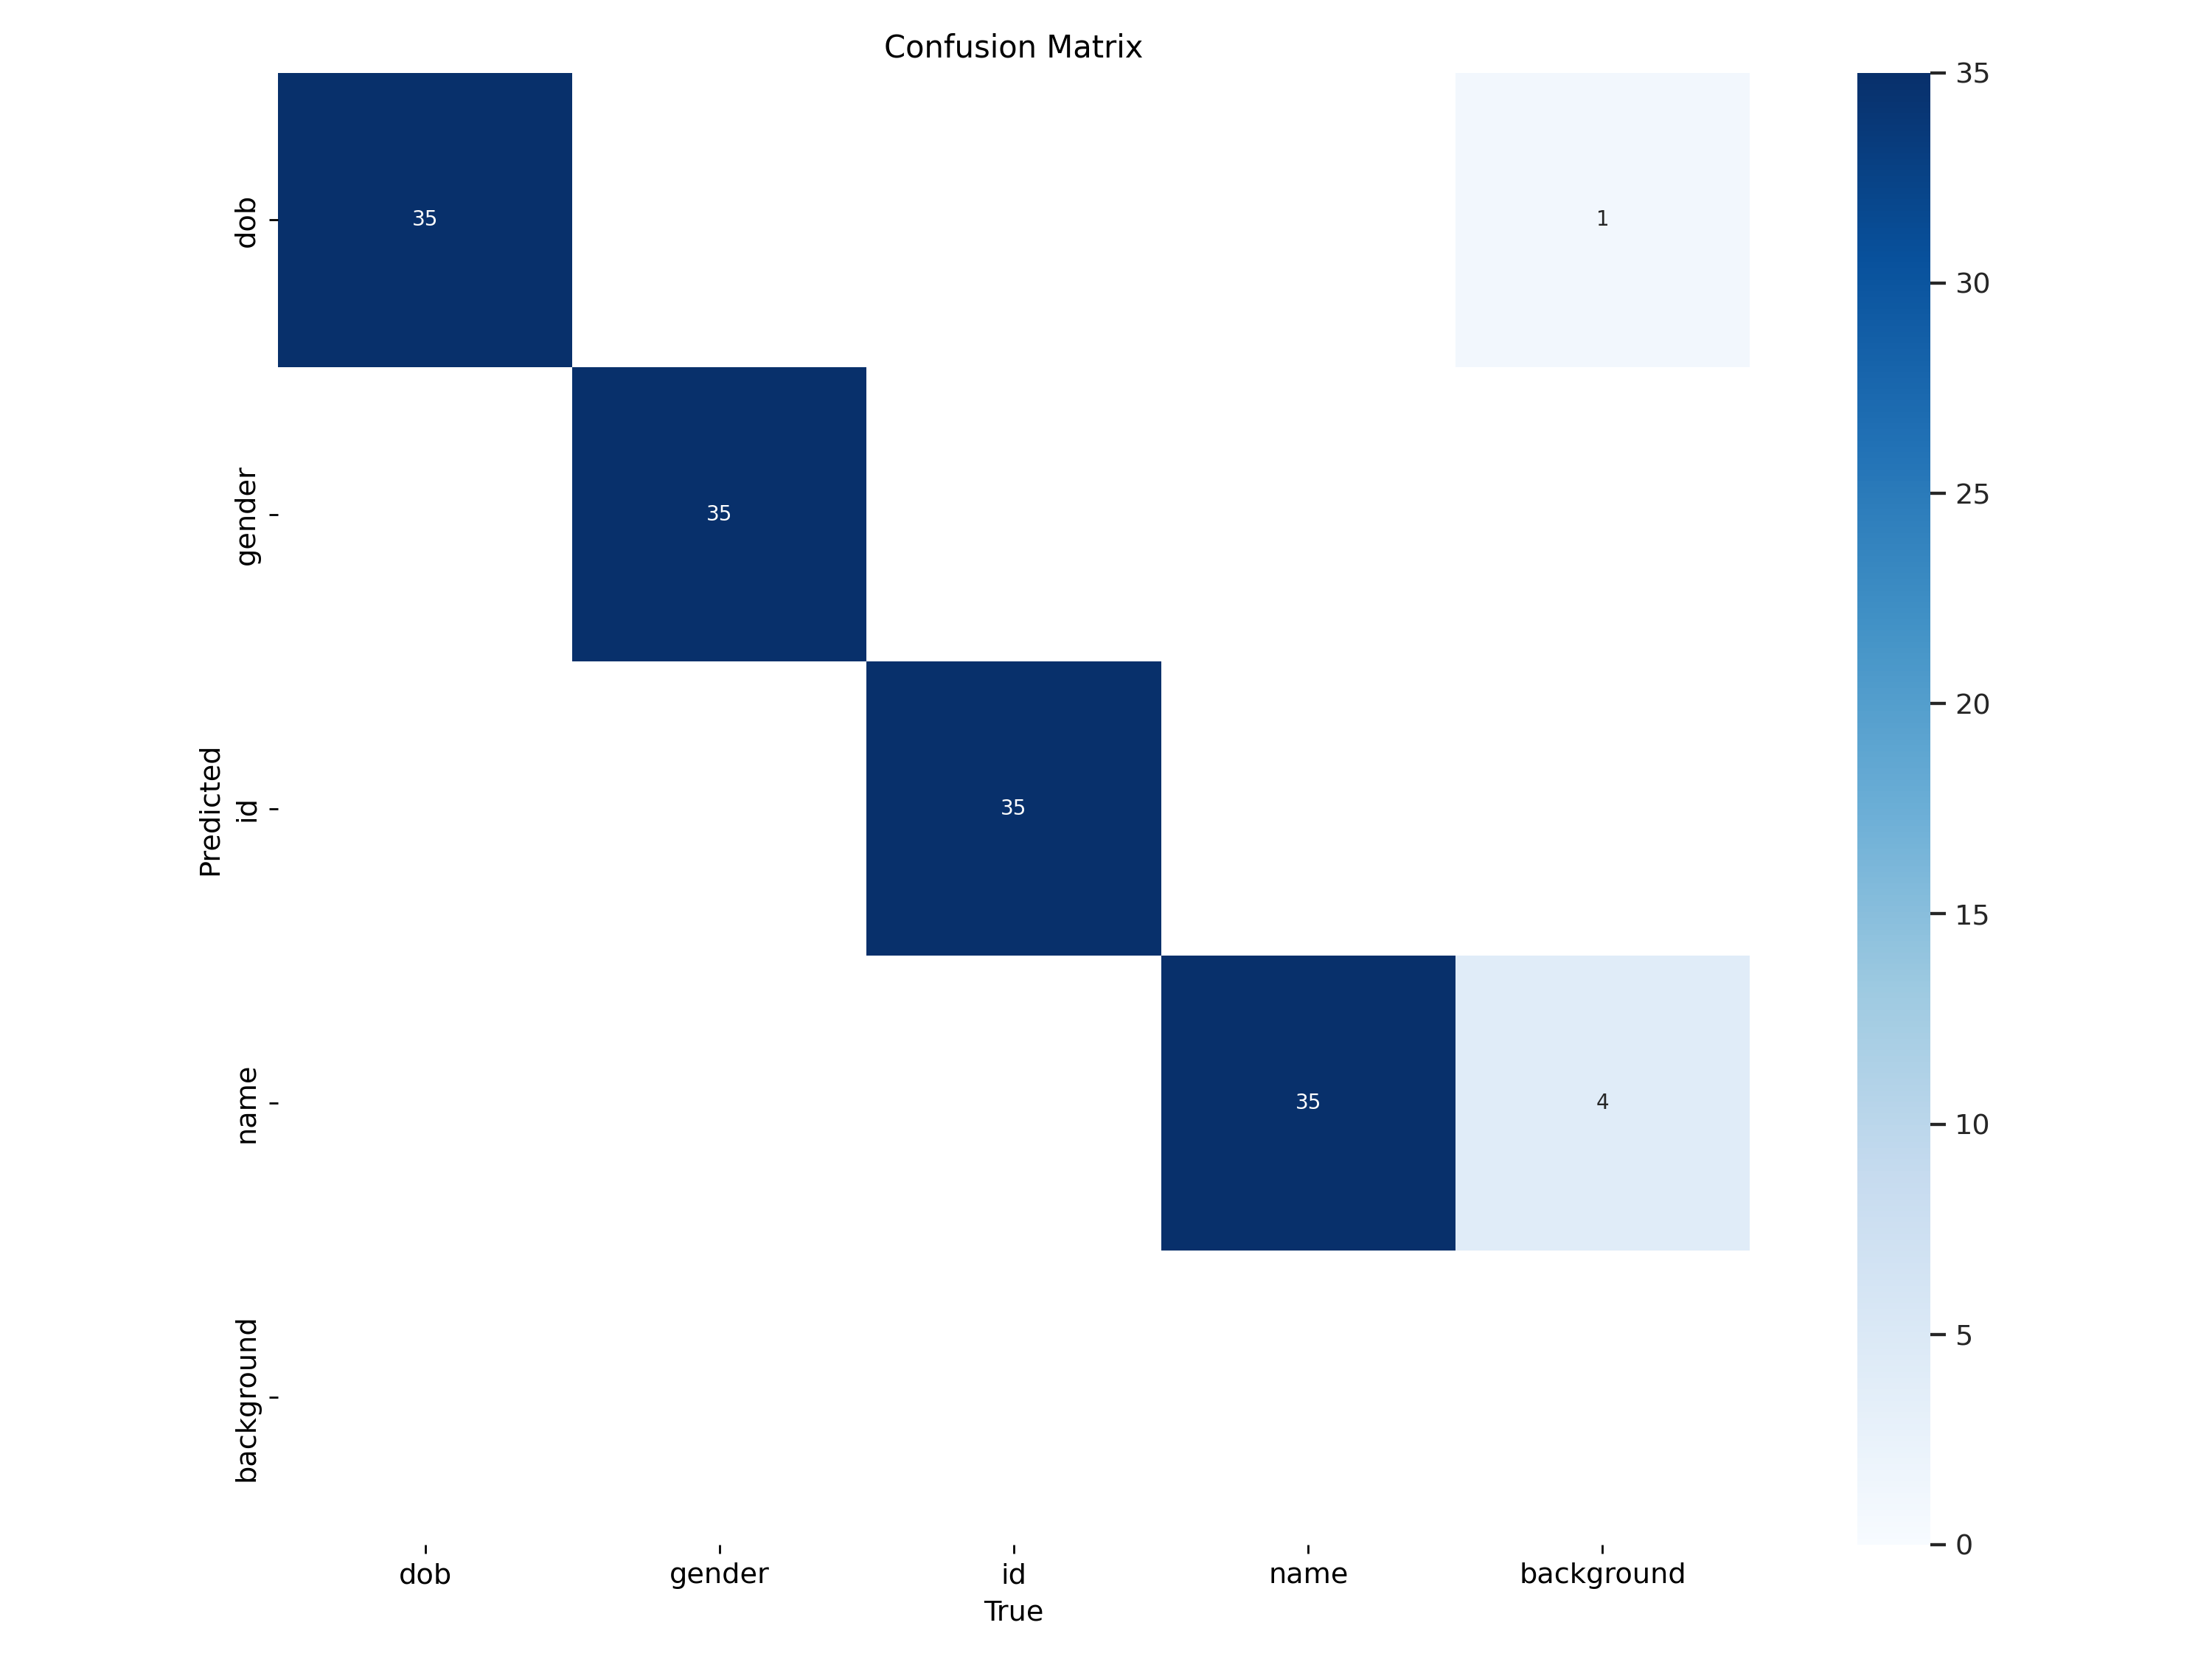

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


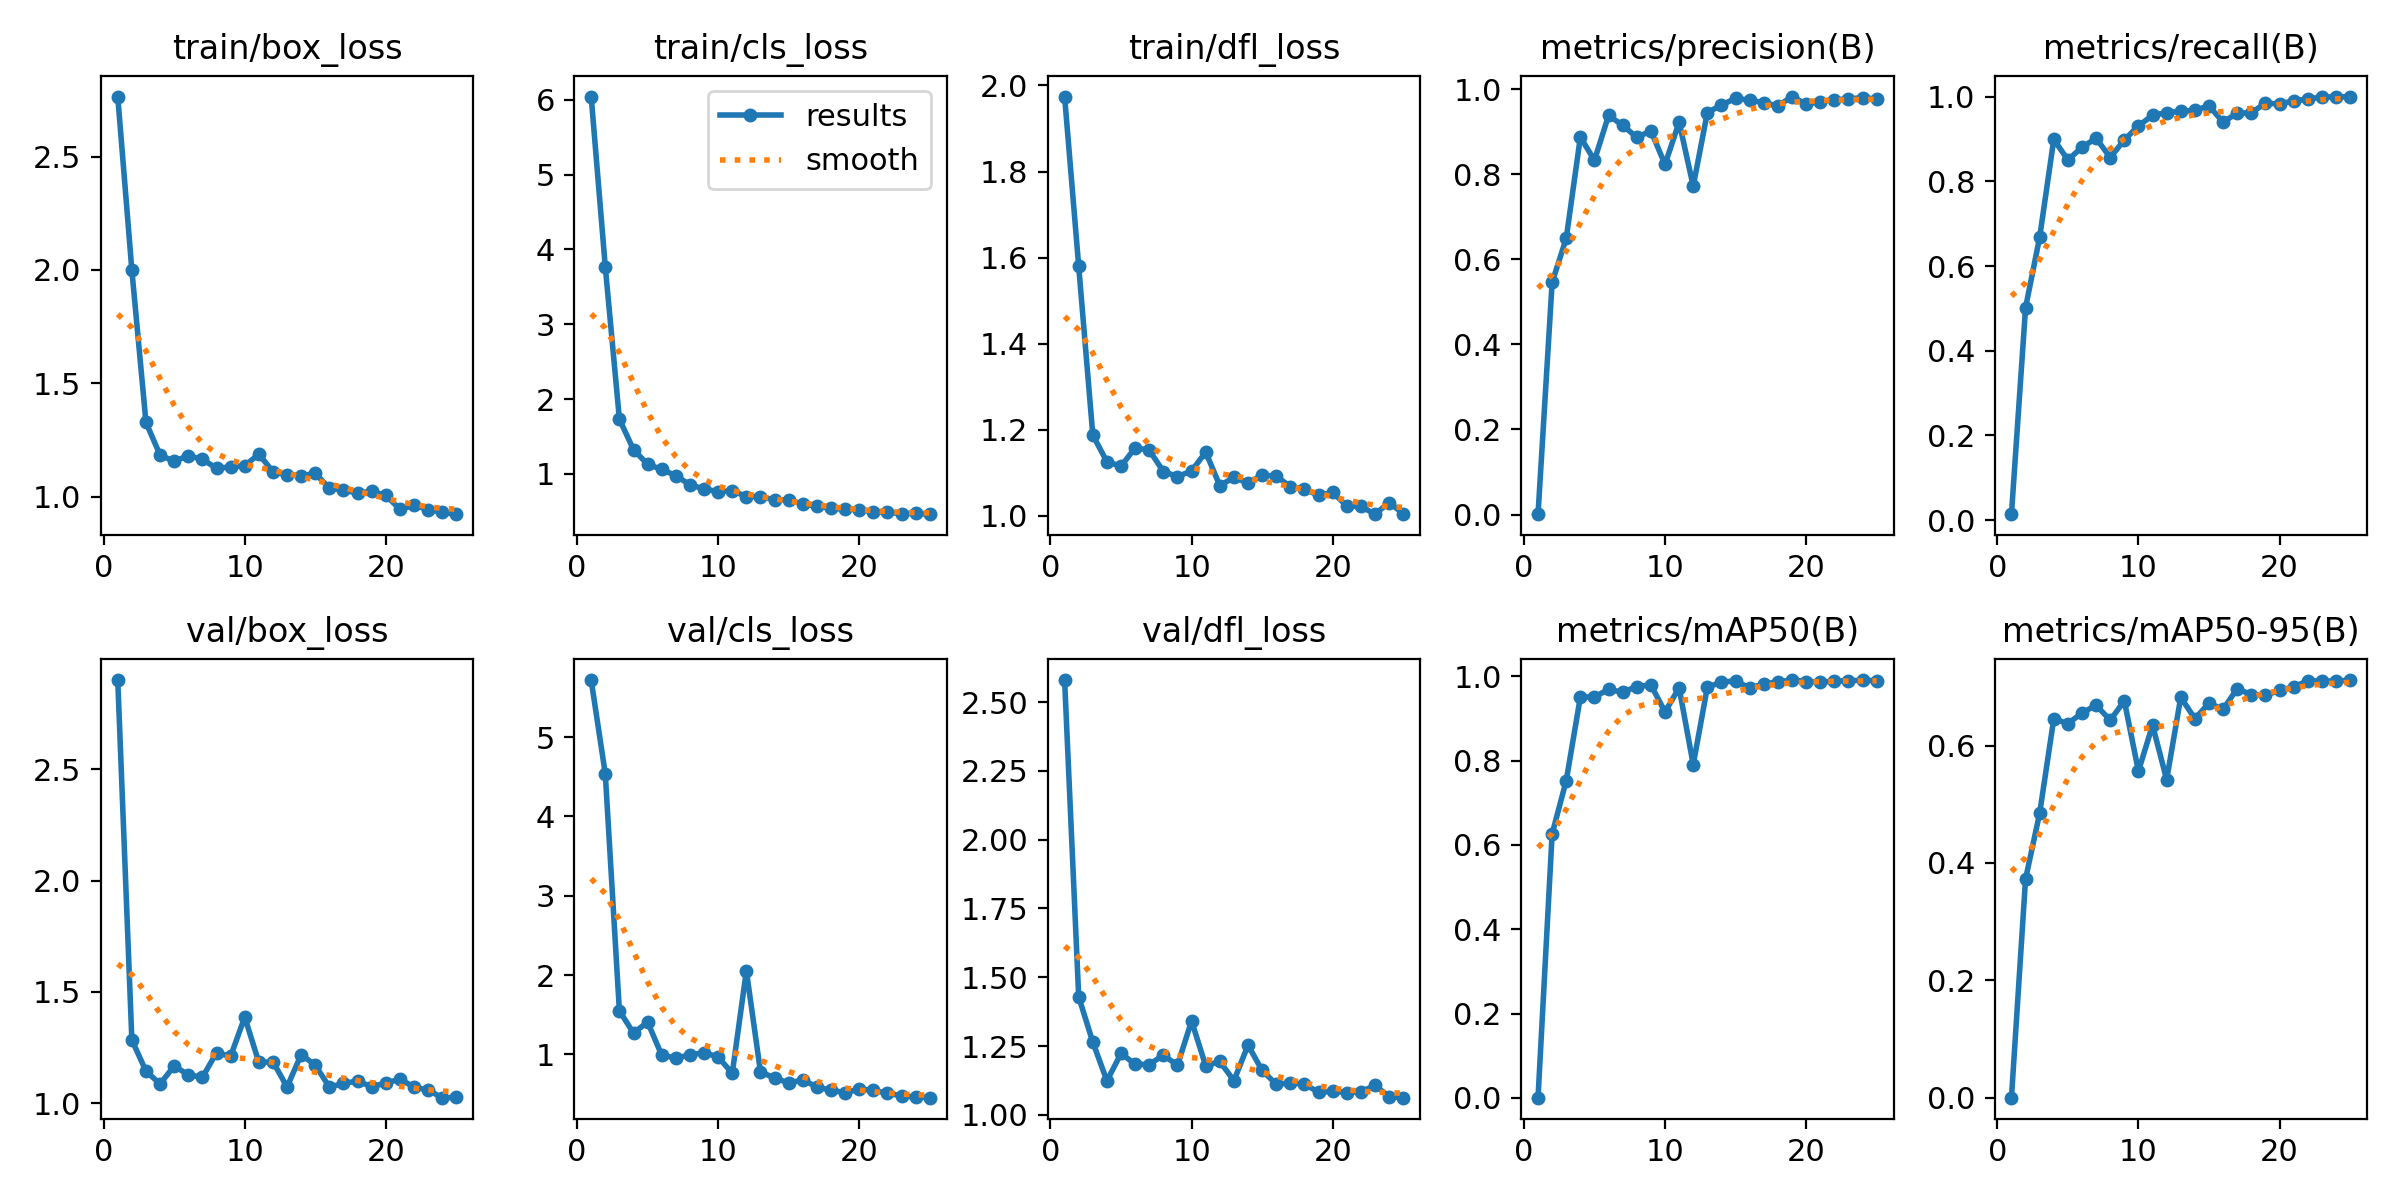

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


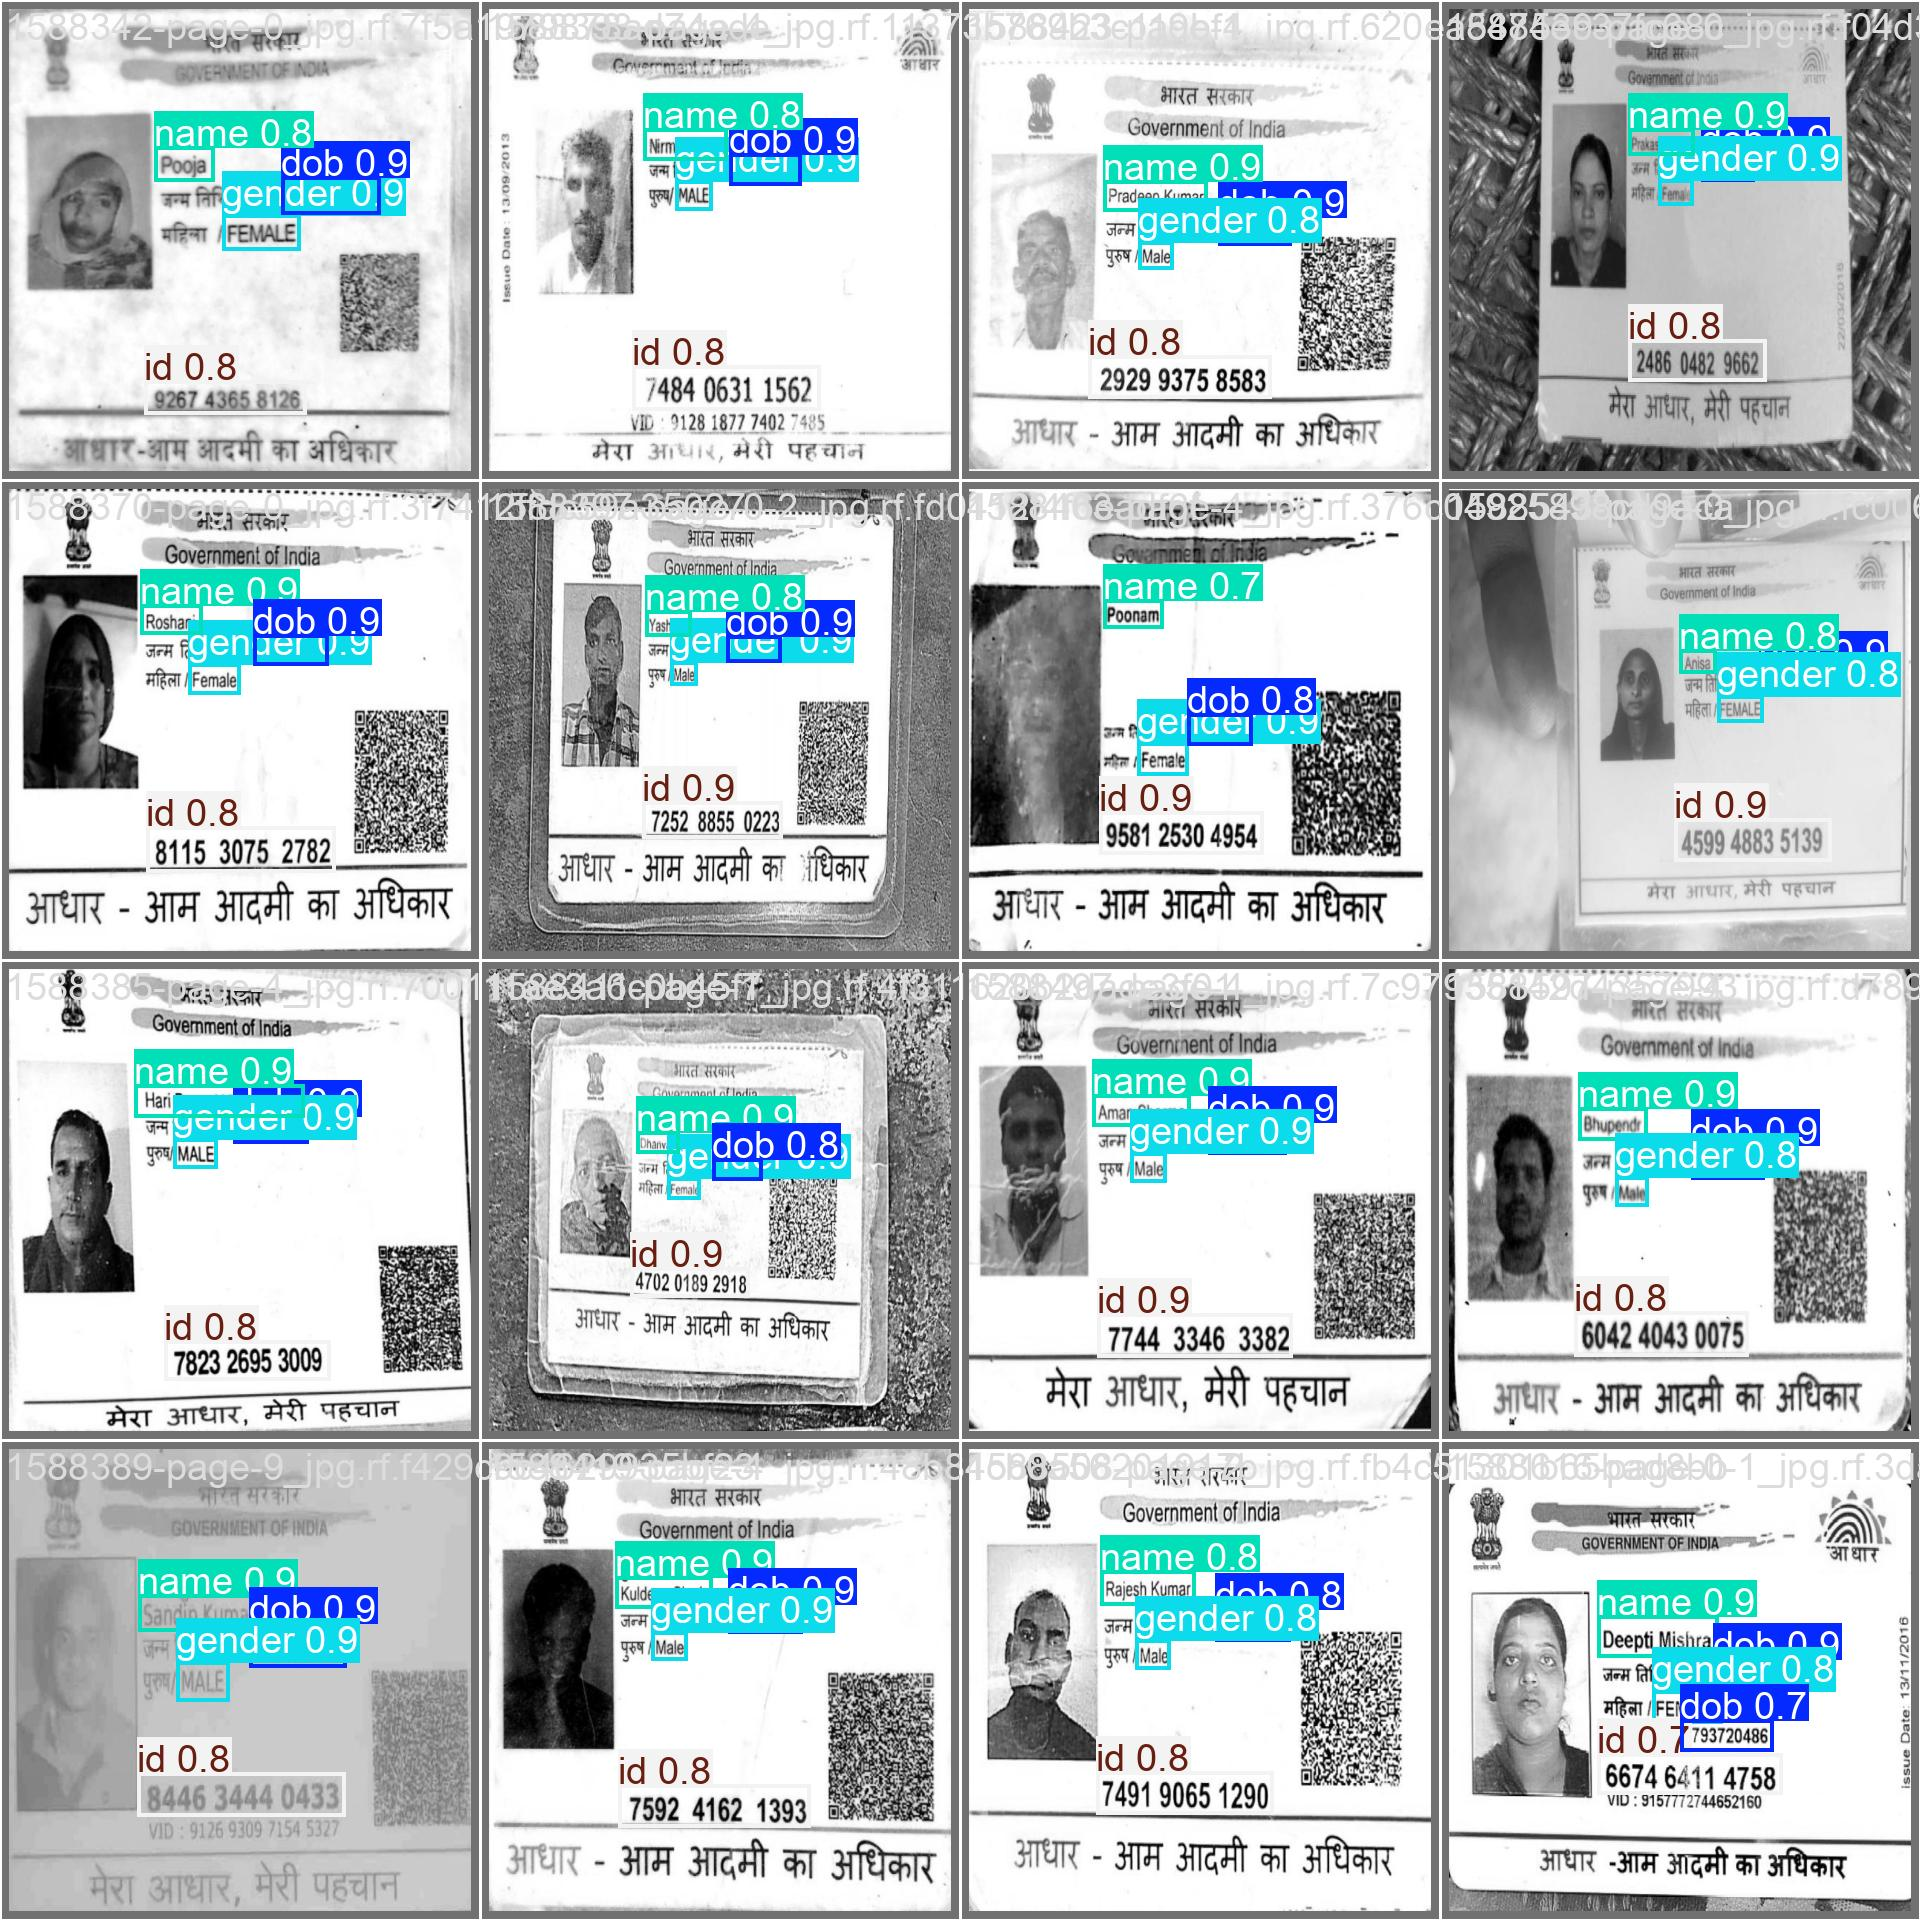

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Aadhar-Card-8/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.64it/s]
                   all         35        140      0.977          1       0.99       0.71
                   dob         35         35      0.972          1      0.995      0.714
                gender         35         35      0.997          1      0.995      0.698
                    id         35         35      0.999          1      0.995      0.725
                  name         35         35       0.94          1      0.975      0.701
Speed: 14.4ms preprocess, 18.1ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn

## Convert to TfLite Model

In [ ]:
!pip install tensorflow==2.13.1

In [ ]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=tflite

In [ ]:
!yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=800

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best_saved_model/best_float32.tflite data={dataset.location}/data.yaml
#!yolo val task=detect model={HOME}/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=800 data={dataset.location}/data.yaml

In [ ]:
!pip install tflite-support-nightly

In [ ]:
!yolo export model=best.pt format=tflite

/bin/bash: line 1: yolo: command not found


In [ ]:
!rm -rf best_saved_model

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter
_MODEL_PATH = "best_saved_model/best_float32.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "/content/labels.txt"
_SAVE_TO_PATH = "all.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)